In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import corner
import corner
import time 

In [4]:
'''
Weibull fitting template. 
'''
np.random.seed(0)

#file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
file_path = "/mnt/scratch-lustre/nhussain/data/distributions/LongScale/"
planet_systems = np.loadtxt(file_path+"Order.txt", dtype = str)
print planet_systems


# Then, define the probability distribution that you would like to sample.
def lnprob(p, vec):
    #vec is the data, p is the mcmc vector, in this case gamma, mu, alpha
    N = len(vec)
    gamma = p[0]
    mu = p[1]
    alpha = 0 #p[2]
    
     
    if gamma <=0: #gamma
        return -np.inf#0
    if alpha <= 0: # alpha
        return -np.inf
    if mu <= vec.min(): # mu must be greater than x
        return -np.inf
    
    try:

        probs = np.log(gamma/alpha) + (gamma-1)*np.log((vec - mu) / alpha) - gamma*((vec - mu)/alpha)
        #-0.5 * N * np.log(2. * np.pi) - N/2. * np.log(np.abs(p[1])**2) - 0.5 \
        #                            * np.sum(( (vec - p[0]) / p[1] ) ** 2)
        
    except:
        probs = - np.inf
       
    return probs


def lnprob2d(p, vec):
    #vec is the data, p is the mcmc vector, in this case gamma, mu, alpha
    N = len(vec)
    gamma = p[0]
    alpha = p[1]
    
     
    if gamma <=0: #gamma
        return -np.inf#0
    if alpha <= 0: # alpha
        return -np.inf
    
    try:

        probs =np.log(gamma) + (gamma -1)*np.log(vec) - vec**gamma
        
    except:
        probs = - np.inf
       
    return probs
                 
                          

print planet_systems.shape

['Sys_1007_1e8.csv' 'Sys_1021_1e8.csv' 'Sys_1025_1e8.csv'
 'Sys_1041_1e8.csv' 'Sys_10518_1e8.csv' 'Sys_1052_1e8.csv'
 'Sys_1107_1e8.csv' 'Sys_1120_1e8.csv' 'Sys_1124_1e8.csv'
 'Sys_1128_1e8.csv' 'Sys_1136_1e8.csv' 'Sys_1137_1e8.csv'
 'Sys_1138_1e8.csv' 'Sys_1169_1e8.csv' 'Sys_1174_1e8.csv'
 'Sys_1190_1e8.csv' 'Sys_1194_1e8.csv' 'Sys_1197_1e8.csv' 'Sys_1_1e8.csv'
 'Sys_1204_1e8.csv' 'Sys_1206_1e8.csv' 'Sys_12073_1e8.csv'
 'Sys_1208_1e8.csv' 'Sys_1217_1e8.csv' 'Sys_1223_1e8.csv'
 'Sys_1230_1e8.csv' 'Sys_1235_1e8.csv' 'Sys_1237_1e8.csv'
 'Sys_1241_1e8.csv' 'Sys_1248_1e8.csv' 'Sys_1251_1e8.csv'
 'Sys_1261_1e8.csv' 'Sys_1266_1e8.csv' 'Sys_1270_1e8.csv'
 'Sys_1277_1e8.csv' 'Sys_12840_1e8.csv' 'Sys_1308_1e8.csv'
 'Sys_1313_1e8.csv' 'Sys_1323_1e8.csv' 'Sys_1324_1e8.csv'
 'Sys_13362_1e8.csv' 'Sys_1337_1e8.csv' 'Sys_1344_1e8.csv'
 'Sys_1350_1e8.csv' 'Sys_1356_1e8.csv' 'Sys_1364_1e8.csv'
 'Sys_1366_1e8.csv' 'Sys_1375_1e8.csv' 'Sys_1379_1e8.csv'
 'Sys_1396_1e8.csv' 'Sys_1403_1e8.csv' 'Sys_1408_1e8

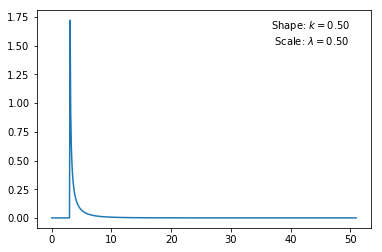

In [20]:
from scipy import stats

#input for pseudo data
N = 10000
gamma_in = 1.8 # 12
alpha_in = 10 # 6
a_in = 1
loc_in = 3 

#Generate data from given input
data = stats.weibull_min.rvs(c=gamma_in, loc=loc_in, scale=alpha_in, size = N)

#The a and loc are fixed in the fit since it is standard to assume they are known
gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)

#Plot
bins = np.linspace(0,51,500)
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
gamma_out = .5
alpha_out =.5
ax.plot(bins, stats.weibull_min.pdf(bins,c=gamma_out,loc=loc_out,scale = alpha_out))
#ax.hist(data, bins = bins , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(gamma_out,alpha_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

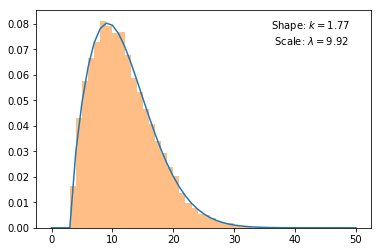

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

#input for pseudo data
N = 10000
gamma_in = 1.8 # 12
alpha_in = 10 # 6
a_in = 1
loc_in = 3 

#Generate data from given input
data = stats.exponweib.rvs(a=a_in,c=gamma_in, loc=loc_in, scale=alpha_in, size = N)

#The a and loc are fixed in the fit since it is standard to assume they are known
a_out, gamma_out, loc_out, alpha_out = stats.exponweib.fit(data, f0=a_in,floc=loc_in)

#Plot
bins = range(51)
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.exponweib.pdf(bins, a=a_out,c=gamma_out,loc=loc_out,scale = alpha_out))
ax.hist(data, bins = bins , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(gamma_out,alpha_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

In [21]:
#try the fit on data without MCMC first
#id, gamma, loc, alpha
values = np.zeros((planet_systems.shape[0], 4))

for jj, planet_sys in enumerate(planet_systems[:]):

    np.random.seed(jj)
    data =pd.read_csv(file_path+"/"+planet_sys, index_col = 0)
    data = data[data["t"]<1e8]
    #print data.shape
    data = np.log10(data["t"].values)
    sys_name = planet_sys.split("_")[1]
    bins = np.linspace(1,10,100)

    #The a and loc are fixed in the fit since it is standard to assume they are known
    #assume loc is the mean of the data?
    #let a be one for now ,
    start = time.time()
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    print   stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    
    #print gamma_out.cov_params()
    
    end = time.time()
    print "System", sys_name, ":", gamma_out, loc_out, alpha_out, "in", end - start
    values[jj, :] = sys_name, gamma_out, loc_out, alpha_out
    '''
    fig = plt.figure(figsize=(8,4)) 
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(bins, stats.weibull_min.pdf(bins,c=gamma_out,loc=loc_out,scale = alpha_out))
    ax.hist(data, normed = 1)
    plt.show()
    '''
    #break


(2.6140265832214782, 4.4475269737221694, 1.2833708909795405)
System 1007 : 2.61402658322 4.44752697372 1.28337089098 in 0.090283870697
(3.2696554455152107, 4.9891496120656083, 1.1296640838764516)
System 1021 : 3.26965544552 4.98914961207 1.12966408388 in 0.0883009433746
(2.2499056286305255, 4.9653366495551534, 0.93856623402183192)
System 1025 : 2.24990562863 4.96533664956 0.938566234022 in 0.0950438976288
(1.8569302556988851, 4.8634394602805067, 0.97227654216700254)
System 1041 : 1.8569302557 4.86343946028 0.972276542167 in 0.0800290107727
(1.5966935984003858, 5.7811114976703646, 0.76195347733814778)
System 10518 : 1.5966935984 5.78111149767 0.761953477338 in 0.0629830360413
(3.5683723669858658, 3.9710057965469576, 1.3526951265987595)
System 1052 : 3.56837236699 3.97100579655 1.3526951266 in 0.0637919902802
(1.7000661304537816, 4.9745220419432297, 0.8059587231393307)
System 1107 : 1.70006613045 4.97452204194 0.805958723139 in 0.151487827301
(3.0669501222427726, 3.8498594185487409, 1.29

(0.74810540524506086, 4.1739215789048583, 0.0026256148530675199)
System 1508 : 0.748105405245 4.1739215789 0.00262561485307 in 0.143759012222
(3.3290544744684798, 5.1984323115900004, 1.5849825217550517)
System 1513 : 3.32905447447 5.19843231159 1.58498252176 in 0.120589017868
(2.6490459509817854, 4.6642954618018182, 1.1182142090539962)
System 1514 : 2.64904595098 4.6642954618 1.11821420905 in 0.0758090019226
(2.741723970005455, 4.8712372959046171, 1.0548457357295618)
System 15220 : 2.74172397001 4.8712372959 1.05484573573 in 0.131175994873
(3.8940922300303527, 3.5245799202310346, 1.9125343110225119)
System 1590 : 3.89409223003 3.52457992023 1.91253431102 in 0.111564874649
(1.6051471939788264, 4.1257776439654386, 0.571611941112667)
System 1598 : 1.60514719398 4.12577764397 0.571611941113 in 0.060252904892
(0.89005129925359272, 4.4166118756589077, 0.033634775048409005)
System 1601 : 0.890051299254 4.41661187566 0.0336347750484 in 0.253978013992
(2.1231690308323681, 3.8109650648433497, 0.

(0.26862713352812861, 2.7599078871798381, 1.7893909418565799e-05)
System 2612 : 0.268627133528 2.75990788718 1.78939094186e-05 in 0.209349155426
(4.4885854509347656, 3.1632442962417953, 1.0894027638634576)
System 28 : 4.48858545093 3.16324429624 1.08940276386 in 0.0931890010834
(1.7217971471950559, 5.2410408530678154, 0.95660425591358811)
System 3000 : 1.7217971472 5.24104085307 0.956604255914 in 0.138648986816
(2.4031265767453651, 4.1185695755108096, 1.3447011363532599)
System 35 : 2.40312657675 4.11856957551 1.34470113635 in 0.0914578437805
(2.1366947806990884, 3.4574253425057915, 2.2546768330137414)
System 3898 : 2.1366947807 3.45742534251 2.25467683301 in 0.108776807785
(2.2484122054527074, 3.0820385558305343, 1.1154873866923558)
System 42 : 2.24841220545 3.08203855583 1.11548738669 in 0.144824981689
(0.38262258175763175, 2.4310712085496142, 0.14732711058011722)
System 4641 : 0.382622581758 2.43107120855 0.14732711058 in 0.195265054703
(0.86494380019151362, 5.8995006066417259, 0.34

In [22]:
values
values_frame = pd.DataFrame(values, columns=["ID", "Gamma", "Location", "Alpha"])
#values_frame.to_csv("../../Figures/MCMCFigures/Weibull_Parameters_145.csv")

In [11]:
print values_frame.shape
values_frame.head(30)

(145, 4)


,ID,Gamma,Location,Alpha
0,1007.0,2.614027,4.447527,1.283371
1,1021.0,3.269655,4.989150,1.129664
2,1025.0,2.249906,4.965337,0.938566
3,1041.0,1.856930,4.863439,0.972277
4,10518.0,1.596694,5.781111,0.761953
5,1052.0,3.568372,3.971006,1.352695
6,1107.0,1.700066,4.974522,0.805959
7,1120.0,3.066950,3.849859,1.290300
8,1124.0,1.130110,3.182193,0.816437
9,1128.0,2.376286,3.722360,1.693260


In [42]:
'''
MCMC fitting template. 
This template fits a 1-d gaussian, if you 
figure out how to use it for more complicated distributions
I'd appreciate if you let me know :)
banados@mpia.de
'''
np.random.seed(0)


# Then, define the probability distribution that you would like to sample.
def lnprob(p, vec):
    #diff = vec-p[0]
    N = len(vec)
    #probs = 
    gamma, mu, alpha = p

    if (gamma <=0) or (alpha <=0) or (mu <vec.min()):
        return -np.inf#0
    try:
        #probs =  -0.5 * N * np.log(2. * np.pi) - N * np.log(np.abs(p[1])) - 0.5 \
        #                            * np.sum(( (vec - p[0]) / p[1] ) ** 2)
        S
        #normalize it by the number of samples, similar to how it was done for the gaussian distribution
        #expression = (gamma/alpha) * ()
        #probs = np.log(gamma/alpha) + (gamma -1)/vec.shape[0]* np.nansum(np.log((vec-mu)/alpha)) - np.nansum(((vec-mu)/alpha)**gamma)/vec.shape[0]
        probs = np.log(gamma/alpha) + (gamma -1) * np.nansum(np.log((vec-mu)/alpha)) - gamma*np.nansum(((vec-mu)/alpha))
        #return probs
        #print "P SHAPE", type(probs)
    except:
        probs = -np.inf
    #print probs
    return probs
                       

print planet_systems.shape

(145,)


1007
Running MCMC ... Done at ... 28.3886599541 seconds.
Mean acceptance fraction: 0.0
[[ 0.05321731  0.00401447  0.00936599]
 [ 0.00401447  0.09234659 -0.01292504]
 [ 0.00936599 -0.01292504  0.07940909]]
0.000371008169897 0.548813503927 0.715189366372 0.602763376072


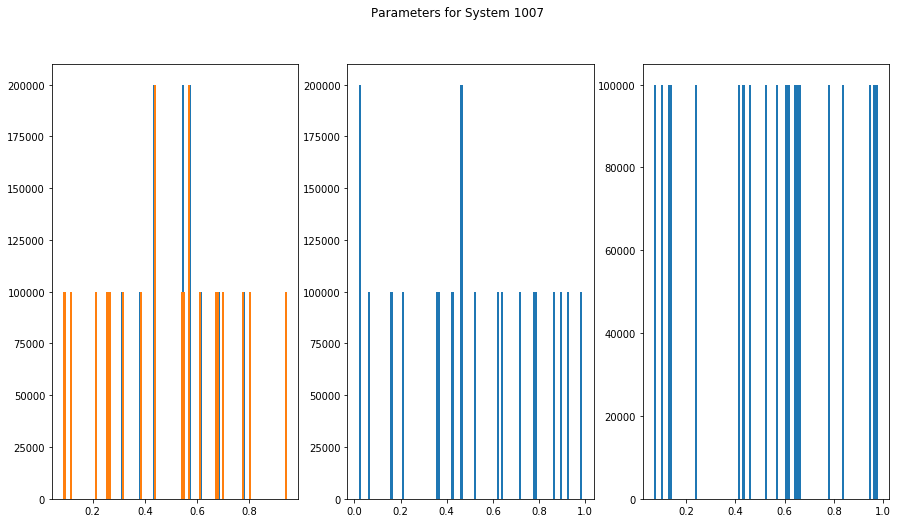

(2000000, 3)


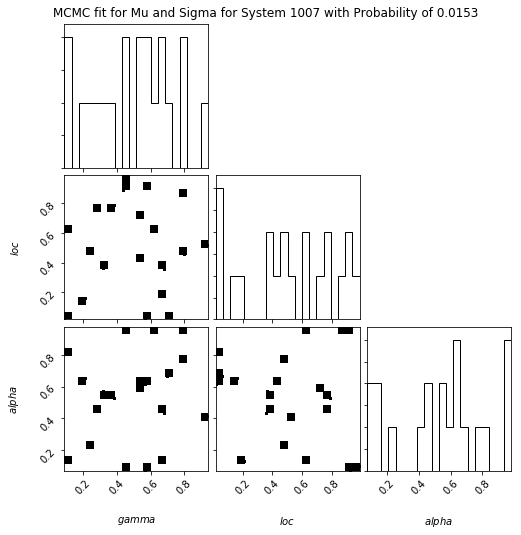

In [44]:
#file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
#planet_systems = np.loadtxt(file_path+"Order.txt", dtype = str)
#print planet_systems
#planet_sys = "Sys_24576_1e8.csv"

#data.head()

nwalkers = 20
ndim = 3
iterations = 100000

#store all the mean and  sigma in one large array, and then plot it all at the very end,
#since there are 48 systems, and 20*1000 samples per system, the final data array will be 960 000 long.
sample_size = nwalkers*iterations*planet_systems.shape[0]
all_walker_samples=np.zeros((int(sample_size), 4)) # add an extra clumn for the system index, and one for iteration number in for loop 
#mean_samples = np.zeros()

values = np.zeros((planet_systems.shape[0], 9), dtype=str)
covariences = np.zeros((planet_systems.shape[0], ndim, ndim))
info = pd.DataFrame(values, columns=["ID", "Probability", "Gamma", "Location", "Alpha", "Gamma_Error", "Location_Error", "Alpha_Error","Determinant"])
#info.head()



for jj, planet_sys in enumerate(planet_systems):

    np.random.seed(jj)
    data =pd.read_csv(file_path+planet_sys, index_col = 0)
    del data["Unnamed: 0.1"]
    del data["runstring"]
    data = data[data["t"]<1e8]
    #print data.shape
    data = np.log10(data["t"].values)
    sys_name = planet_sys.split("_")[1]
    print sys_name

    
   

    # Choose an initial set of positions for the walkers.
    p0 = [np.random.rand(ndim) for i in xrange(nwalkers)]
    #print p0
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[data], a=.1)
    
    # Run 200 steps as a burn-in.
    #print "Burning in ..."
    pos, prob, state = sampler.run_mcmc(p0, 1000)

    # Reset the chain to remove the burn-in samples.
    sampler.reset()
    
    print "Running MCMC ...",
    start = time.time()
    try:
        pos, prob, state = sampler.run_mcmc(pos, iterations, rstate0=jj)
    except Exception as e:
        print e
        print planet_sys
        continue
        
    end = time.time()
    print "Done at ...", (end - start), "seconds." 
    af = sampler.acceptance_fraction
    print "Mean acceptance fraction:", np.mean(af)
    

    #Determine the best mean and sigma
    maxprob_indice = np.argmax(prob)
    gamma_fit, loc_fit, alpha_fit = pos[maxprob_indice]
    #sigma_fit = np.abs(sigma_fit)
    #print "Estimated parameters: mean, sigma = %f, %f" % (mean_fit, sigma_fit)
    gamma_samples = sampler.flatchain[:,0]
    loc_samples = sampler.flatchain[:,1]
    alpha_samples = sampler.flatchain[:,2]
    gamma_std = gamma_samples.std()
    loc_std = loc_samples.std()

    alpha_std =np.std(np.abs(alpha_samples) )
    
    covarience = np.cov([gamma_samples, loc_samples, alpha_samples])
    print covarience
    determinant = np.linalg.det(covarience)
    print determinant, gamma_fit, loc_fit, alpha_fit
    covariences[jj, :, :] = covarience
    
    #'''
    ##PLOT SAMPLING SPACE
    fig = plt.figure(figsize=(15, 8))
    ax =fig.add_subplot("131")
    ax2 = fig.add_subplot("132")
    ax3 = fig.add_subplot("133")
    ax.hist(gamma_samples, 100)
    #ax.set_title("Samples for Mean - Optimal at " + str("{0:.4f}".format(mean_fit))+ " + "+ str("{0:.4f}".format(mean_std)))
    #ax2.set_title("Samples for Sigma - Optimal at " + str("{0:.4f}".format(sigma_fit))+ " + "+ str("{0:.4f}".format(sigma_std)))
    ax.hist(gamma_samples,  bins = np.linspace(np.min(np.abs(gamma_samples)), np.max(gamma_samples), 100))
    ax2.hist(loc_samples,  bins = np.linspace(np.min(np.abs(loc_samples)), np.max(loc_samples), 100))
    ax3.hist(alpha_samples,  bins = np.linspace(np.min(np.abs(alpha_samples)), np.max(alpha_samples), 100))

    fig.suptitle("Parameters for System "+sys_name)
    plt.show()
    #fig.savefig("../../MLstability/Figures/MCMCFigures/Parameters_"+sys_name, bbox_inches='tight')
    #plt.close(fig)
    #'''
    
    
    
    ##PLOT CORNER PLOT
    probability = np.log(gamma_fit/alpha_fit) + \
        (gamma_fit -1)/data.shape[0]* np.nansum(np.log((data-loc_fit)/alpha_fit)) - np.nansum(((data-loc_fit)/alpha_fit)**gamma_fit)/data.shape[0]
       
    #-np.log(2*np.pi)/2. - np.log(sigma_fit**2.)/2.-(1./(sigma_fit**2.)/2./info.shape[0])*np.nansum((data-mean_fit)**2.)
    samples = sampler.chain[:, :, :].reshape((-1, ndim))
    #'''
    print samples.shape
    fig = plt.figure(figsize=(12, 12))
    fig = corner.corner(samples, labels=["$gamma$", "$loc$", "$alpha$"],  figsize = (12, 12))
    fig.suptitle("MCMC fit for Mu and Sigma for System "+ sys_name + " with Probability of "+ str("{:.4f}".format(np.exp(probability))))
    #fig.savefig("../../MLstability/Figures/MCMCFigures/System_"+sys_name, bbox_inches='tight')
    #plt.close(fig)
    plt.show()
    #'''
       
    #'''
    #SAVE INFO OF INTEREST
    if np.exp(probability)>1:
        info.loc[jj] = [sys_name]+[np.inf]+[gamma_fit, loc_fit, alpha_fit] + [np.inf]*4

    else:
        info.loc[jj] = [sys_name, np.exp(probability), gamma_fit, loc_fit, alpha_fit, gamma_std, loc_std, alpha_std, determinant]
    #print sys_name , probability, np.exp(probability),"\n"
    #'''

    #save all the wallker values to be plotted later on
    #the thrid column in the system name
    #the fourth column is giving an index number, used for creating the custom color bar
    #all_walker_samples[(jj)*int(iterations*nwalkers):(jj+1)*int(iterations*nwalkers), :2] = samples[:,:]
    #all_walker_samples[(jj)*int(iterations*nwalkers):(jj+1)*int(iterations*nwalkers):,2] = sys_name
    #all_walker_samples[(jj)*int(iterations*nwalkers):(jj+1)*int(iterations*nwalkers):,3] = jj

    break

In [19]:
#info
info.to_csv("../../Figures/MCMCFigures/Weibull_MCMC_Params_145.csv")
info

,ID,Probability,Gamma,Location,Alpha,Gamma_Error,Location_Error,Alpha_Error,Determinant
0,1007,0.0152997,0.548814,0.715189,0.602763,0.230689,0.303886,0.281796,0.000371013
1,1021,3.73566e-38,0.417022,0.720324,0.000114375,0.264467,0.301296,0.319326,0.000530041
2,1025,0.0130017,0.435995,0.0259262,0.549662,0.271411,0.290108,0.22794,0.000312745
3,1041,0.00437459,0.550798,0.708148,0.290905,0.242771,0.224148,0.273904,0.00019012
4,10518,0.00303382,0.96703,0.547232,0.972684,0.274328,0.320001,0.252004,0.000468182
5,1052,0.014216,0.221993,0.870732,0.206719,0.314959,0.312532,0.277383,0.000591241
6,1107,0.00426638,0.89286,0.33198,0.821229,0.258036,0.248078,0.249252,0.000238405
7,1120,0.00657231,0.0763083,0.779919,0.438409,0.261139,0.272808,0.193199,0.000112842
8,1124,0.0376145,0.873429,0.968541,0.869195,0.286092,0.311353,0.276359,0.000501757
9,1128,0.000816578,0.0103742,0.501875,0.495773,0.304293,0.287476,0.284201,0.000567725


In [47]:
import numpy as np
from statsmodels.base.model import GenericLikelihoodModel

from scipy.stats import gamma, weibull_min, frechet_r
gamma = 2; loc = 0.71; alpha = 0.0166
data = weibull_min.rvs(gamma, loc=loc, scale=alpha, size=1000)
params = weibull_min.fit(data) # params close to but not the same as (shape, loc, scale) 
# HOW TO ESTIMATE/GET ERRORS FOR EACH PARAM?

print(params)
print('\n')


class Weibull(GenericLikelihoodModel):

    nparams = 3

    def loglike(self, params):
        return weibull_min.logpdf(self.endog, *params).sum()

start = time.time()
res = Weibull(data).fit(start_params=params, maxiter= 1000000)
end = time.time()
print "Time taken", end - start
res.df_model = len(params)
res.df_resid = len(data) - len(params)
print(res.summary())


(1.9184949094942234, 0.71019005221825171, 0.016284840052308777)


Optimization terminated successfully.
         Current function value: -3.493890
         Iterations: 53
         Function evaluations: 94
Time taken 0.713670015335
                               Weibull Results                                
Dep. Variable:                      y   Log-Likelihood:                 3493.9
Model:                        Weibull   AIC:                            -6980.
Method:            Maximum Likelihood   BIC:                            -6960.
Date:                Fri, 08 Sep 2017                                         
Time:                        11:18:14                                         
No. Observations:                1000                                         
Df Residuals:                     997                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|    

In [102]:
#try the fit on data without MCMC first
#id, gamma, loc, alpha
values = np.zeros((planet_systems.shape[0], 6))
covariences = np.zeros((planet_systems.shape[0], 3, 3))

for jj, planet_sys in enumerate(planet_systems[:]):

    np.random.seed(jj)
    data =pd.read_csv("../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"+planet_sys, index_col = 0)
    data = data[data["t"]<1e8]
    data = np.log10(data["t"].values)
    sys_name = planet_sys.split("_")[1]
    print sys_name
    start = time.time()
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    print   stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    params = gamma_out, loc_out, alpha_out
    end = time.time()
    #print "System", sys_name, ":", gamma_out, loc_out, alpha_out, "in", end - start
    try:
        
        res = Weibull(data).fit(start_params=params, maxiter= 10000, method='basinhopping', tol = 0.0001 )
        res.df_model = len(params)
        res.df_resid = len(data) - len(params)
        #print res.summary()
        covariences[jj, :, :] = res.cov_params()
        determinant = np.linalg.det(covariences[jj, :, :])
        log_prob = res.llf
        gamma_out, loc_out, alpha_out = res.params.tolist()
        values[jj, :] = sys_name, gamma_out, loc_out, alpha_out, determinant, log_prob
    except Exception as e:
        print e
        #use values from scipy fit, add infi for det to show it did not work
        values[jj, :] = sys_name, gamma_out, loc_out, alpha_out, np.inf, np.inf

    print res.params
    #break


10518
(1.5966935984003858, 5.7811114976703646, 0.76195347733814778)
basinhopping step 0: f 0.48244
basinhopping step 1: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 2: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 3: f 0.48244 trial_f 0.48244 accepted 1  lowest_f 0.48244
found new global minimum on step 3 with function value 0.48244
basinhopping step 4: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 5: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 6: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 7: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 8: f 0.48244 trial_f 0.48244 accepted 1  lowest_f 0.48244
found new global minimum on step 8 with function value 0.48244
basinhopping step 9: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 10: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 11: f 0.48244 trial_f 0.4824

(3.3769570626481622, 4.5109300275066042, 0.83156994439584631)
basinhopping step 0: f -0.00852253
basinhopping step 1: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhopping step 2: f -0.00852253 trial_f -0.00852253 accepted 1  lowest_f -0.00852253
found new global minimum on step 2 with function value -0.00852253
basinhopping step 3: f -0.00852253 trial_f -0.00852253 accepted 1  lowest_f -0.00852253
basinhopping step 4: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhopping step 5: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhopping step 6: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhopping step 7: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhopping step 8: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhopping step 9: f -0.00852253 trial_f -0.00852253 accepted 1  lowest_f -0.00852253
basinhopping step 10: f -0.00852253 trial_f inf accepted 0  lowest_f -0.00852253
basinhoppin

(1.4938123441931372, 3.7869454994243457, 0.81588591739377381)
basinhopping step 0: f 0.575111
basinhopping step 1: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
found new global minimum on step 1 with function value 0.575111
basinhopping step 2: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 3: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 4: f 0.575111 trial_f inf accepted 0  lowest_f 0.575111
basinhopping step 5: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 6: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 7: f 0.575111 trial_f inf accepted 0  lowest_f 0.575111
basinhopping step 8: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 9: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 10: f 0.575111 trial_f inf accepted 0  lowest_f 0.575111
basinhopping step 11: f 0.575111 trial_f 0.575111 accepted 1  lowe

basinhopping step 96: f 0.879027 trial_f 0.879027 accepted 1  lowest_f 0.575111
basinhopping step 97: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
basinhopping step 98: f 0.575111 trial_f inf accepted 0  lowest_f 0.575111
basinhopping step 99: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
adaptive stepsize: acceptance rate 0.570000 target 0.500000 new stepsize 0.617284 old stepsize 0.555556
basinhopping step 100: f 0.575111 trial_f 0.575111 accepted 1  lowest_f 0.575111
[ 1.49376296  3.78694578  0.81589732]
12840
(2.251987720751691, 3.3828445748238254, 1.4935258985203057)
basinhopping step 0: f 0.889868
basinhopping step 1: f 0.889868 trial_f inf accepted 0  lowest_f 0.889868
basinhopping step 2: f 0.889868 trial_f inf accepted 0  lowest_f 0.889868
basinhopping step 3: f 0.889868 trial_f 0.889868 accepted 1  lowest_f 0.889868
basinhopping step 4: f 0.889868 trial_f 0.889868 accepted 1  lowest_f 0.889868
found new global minimum on step 4 with function value 0.8

basinhopping step 96: f 0.889868 trial_f inf accepted 0  lowest_f 0.889868
basinhopping step 97: f 0.889868 trial_f 0.889868 accepted 1  lowest_f 0.889868
basinhopping step 98: f 0.889868 trial_f 0.889868 accepted 1  lowest_f 0.889868
basinhopping step 99: f 0.889868 trial_f 0.889868 accepted 1  lowest_f 0.889868
adaptive stepsize: acceptance rate 0.480000 target 0.500000 new stepsize 0.405 old stepsize 0.45
basinhopping step 100: f 0.889868 trial_f inf accepted 0  lowest_f 0.889868
[ 2.25199403  3.3828436   1.49350811]
13362
(0.058621171128640605, 1.8740321740607584, 0.42275468886137235)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest

basinhopping step 82: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 83: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 95: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 96: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 97: f n

basinhopping step 73: f 0.602191 trial_f 0.602191 accepted 1  lowest_f 0.602191
basinhopping step 74: f 0.602191 trial_f inf accepted 0  lowest_f 0.602191
basinhopping step 75: f 0.602191 trial_f 0.602191 accepted 1  lowest_f 0.602191
basinhopping step 76: f 0.602191 trial_f inf accepted 0  lowest_f 0.602191
basinhopping step 77: f 0.602191 trial_f 0.602191 accepted 1  lowest_f 0.602191
basinhopping step 78: f 0.602191 trial_f 0.602191 accepted 1  lowest_f 0.602191
basinhopping step 79: f 0.602191 trial_f inf accepted 0  lowest_f 0.602191
basinhopping step 80: f 0.602191 trial_f 0.602191 accepted 1  lowest_f 0.602191
basinhopping step 81: f 0.602191 trial_f inf accepted 0  lowest_f 0.602191
basinhopping step 82: f 0.602191 trial_f inf accepted 0  lowest_f 0.602191
basinhopping step 83: f 0.602191 trial_f 0.602191 accepted 1  lowest_f 0.602191
basinhopping step 84: f 0.602191 trial_f inf accepted 0  lowest_f 0.602191
basinhopping step 85: f 0.602191 trial_f 0.602191 accepted 1  lowest_f

basinhopping step 77: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 78: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 79: f 0.4018 trial_f inf accepted 0  lowest_f 0.4018
basinhopping step 80: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 81: f 0.4018 trial_f inf accepted 0  lowest_f 0.4018
basinhopping step 82: f 0.4018 trial_f inf accepted 0  lowest_f 0.4018
basinhopping step 83: f 0.4018 trial_f inf accepted 0  lowest_f 0.4018
basinhopping step 84: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 85: f 0.4018 trial_f inf accepted 0  lowest_f 0.4018
basinhopping step 86: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 87: f 0.4018 trial_f inf accepted 0  lowest_f 0.4018
basinhopping step 88: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 89: f 0.4018 trial_f 0.4018 accepted 1  lowest_f 0.4018
basinhopping step 90: f 0.4018 trial_f 0.4018 accepted 1

basinhopping step 77: f 0.627937 trial_f 0.627937 accepted 1  lowest_f 0.627937
basinhopping step 78: f 0.627937 trial_f inf accepted 0  lowest_f 0.627937
basinhopping step 79: f 0.627937 trial_f inf accepted 0  lowest_f 0.627937
basinhopping step 80: f 0.627937 trial_f 0.627937 accepted 1  lowest_f 0.627937
basinhopping step 81: f 0.627937 trial_f inf accepted 0  lowest_f 0.627937
basinhopping step 82: f 0.627937 trial_f 0.627937 accepted 1  lowest_f 0.627937
basinhopping step 83: f 0.627937 trial_f 0.627937 accepted 1  lowest_f 0.627937
basinhopping step 84: f 0.627937 trial_f inf accepted 0  lowest_f 0.627937
basinhopping step 85: f 0.627937 trial_f inf accepted 0  lowest_f 0.627937
basinhopping step 86: f 0.627937 trial_f 0.627937 accepted 1  lowest_f 0.627937
basinhopping step 87: f 0.627937 trial_f inf accepted 0  lowest_f 0.627937
basinhopping step 88: f 0.627937 trial_f 0.627937 accepted 1  lowest_f 0.627937
basinhopping step 89: f 0.627937 trial_f inf accepted 0  lowest_f 0.62

basinhopping step 76: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 77: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 78: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 79: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 80: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 81: f 0.457495 trial_f inf accepted 0  lowest_f 0.457495
basinhopping step 82: f 0.457495 trial_f inf accepted 0  lowest_f 0.457495
basinhopping step 83: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 84: f 0.457495 trial_f inf accepted 0  lowest_f 0.457495
basinhopping step 85: f 0.457495 trial_f inf accepted 0  lowest_f 0.457495
basinhopping step 86: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 87: f 0.457495 trial_f 0.457495 accepted 1  lowest_f 0.457495
basinhopping step 88: f 0.457495 trial_f inf accepted 0  low

basinhopping step 73: f 0.755021 trial_f 0.755021 accepted 1  lowest_f 0.755021
basinhopping step 74: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 75: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 76: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 77: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 78: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 79: f 0.755021 trial_f 0.755021 accepted 1  lowest_f 0.755021
basinhopping step 80: f 0.755021 trial_f 0.755021 accepted 1  lowest_f 0.755021
basinhopping step 81: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 82: f 0.755021 trial_f inf accepted 0  lowest_f 0.755021
basinhopping step 83: f 0.755021 trial_f 0.755021 accepted 1  lowest_f 0.755021
basinhopping step 84: f 0.755021 trial_f 0.755021 accepted 1  lowest_f 0.755021
basinhopping step 85: f 0.755021 trial_f 0.755021 accepted 1  lowest_f 0.75

basinhopping step 68: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 69: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 70: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 71: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 72: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 73: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 74: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 75: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 76: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 77: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 78: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 79: f 0.719965 trial_f 0.719965 accepted 1  lowest_f 0.719965
basinhopping step 80: f 0.719965 trial_f

basinhopping step 66: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 67: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 68: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 69: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 70: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 71: f 0.692113 trial_f inf accepted 0  lowest_f 0.692113
basinhopping step 72: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 73: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 74: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 75: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 76: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 77: f 0.692113 trial_f 0.692113 accepted 1  lowest_f 0.692113
basinhopping step 78: f 0.692113 trial_f 0.69

basinhopping step 64: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 65: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 66: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 67: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 68: f 0.650789 trial_f inf accepted 0  lowest_f 0.650789
basinhopping step 69: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 70: f 0.650789 trial_f inf accepted 0  lowest_f 0.650789
basinhopping step 71: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 72: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 73: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 74: f 0.650789 trial_f 0.650789 accepted 1  lowest_f 0.650789
basinhopping step 75: f 0.650789 trial_f inf accepted 0  lowest_f 0.650789
basinhopping step 76: f 0.650789 trial_f 0.650789 accep

basinhopping step 65: f 0.362492 trial_f inf accepted 0  lowest_f 0.362492
basinhopping step 66: f 0.362492 trial_f inf accepted 0  lowest_f 0.362492
basinhopping step 67: f 0.362492 trial_f inf accepted 0  lowest_f 0.362492
basinhopping step 68: f 0.362492 trial_f 0.362492 accepted 1  lowest_f 0.362492
basinhopping step 69: f 0.362492 trial_f inf accepted 0  lowest_f 0.362492
basinhopping step 70: f 0.362492 trial_f inf accepted 0  lowest_f 0.362492
basinhopping step 71: f 0.362492 trial_f 0.362492 accepted 1  lowest_f 0.362492
basinhopping step 72: f 0.362492 trial_f inf accepted 0  lowest_f 0.362492
basinhopping step 73: f 0.362492 trial_f 0.362492 accepted 1  lowest_f 0.362492
basinhopping step 74: f 0.362492 trial_f 0.796174 accepted 0  lowest_f 0.362492
basinhopping step 75: f 0.362492 trial_f 0.362492 accepted 1  lowest_f 0.362492
basinhopping step 76: f 0.362492 trial_f 0.362492 accepted 1  lowest_f 0.362492
basinhopping step 77: f 0.362492 trial_f 0.362492 accepted 1  lowest_f

basinhopping step 57: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 58: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 59: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 60: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 61: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 62: f 0.47687 trial_f inf accepted 0  lowest_f 0.47687
basinhopping step 63: f 0.47687 trial_f inf accepted 0  lowest_f 0.47687
basinhopping step 64: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 65: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 66: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
found new global minimum on step 66 with function value 0.47687
basinhopping step 67: f 0.47687 trial_f inf accepted 0  lowest_f 0.47687
basinhopping step 68: f 0.47687 trial_f 0.47687 accepted 1  lowest_f 0.47687
basinhopping step 69: f 

basinhopping step 56: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 57: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 58: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 59: f 0.571585 trial_f inf accepted 0  lowest_f 0.571585
basinhopping step 60: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 61: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 62: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 63: f 0.571585 trial_f inf accepted 0  lowest_f 0.571585
basinhopping step 64: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
found new global minimum on step 64 with function value 0.571585
basinhopping step 65: f 0.571585 trial_f 0.571585 accepted 1  lowest_f 0.571585
basinhopping step 66: f 0.571585 trial_f inf accepted 0  lowest_f 0.571585
basinhopping step 67: f 0.571585 trial_f inf accepted 0  lowest_f 0.57

basinhopping step 59: f 0.998355 trial_f 0.998355 accepted 1  lowest_f 0.998355
basinhopping step 60: f 0.998355 trial_f inf accepted 0  lowest_f 0.998355
basinhopping step 61: f 0.998355 trial_f 0.998355 accepted 1  lowest_f 0.998355
basinhopping step 62: f 0.998355 trial_f 0.998355 accepted 1  lowest_f 0.998355
basinhopping step 63: f 0.998355 trial_f inf accepted 0  lowest_f 0.998355
basinhopping step 64: f 0.998355 trial_f inf accepted 0  lowest_f 0.998355
basinhopping step 65: f 0.998355 trial_f inf accepted 0  lowest_f 0.998355
basinhopping step 66: f 0.998355 trial_f 0.998355 accepted 1  lowest_f 0.998355
basinhopping step 67: f 0.998355 trial_f 0.998355 accepted 1  lowest_f 0.998355
basinhopping step 68: f 0.998355 trial_f inf accepted 0  lowest_f 0.998355
basinhopping step 69: f 0.998355 trial_f 0.998355 accepted 1  lowest_f 0.998355
basinhopping step 70: f 0.998355 trial_f inf accepted 0  lowest_f 0.998355
basinhopping step 71: f 0.998355 trial_f 0.998355 accepted 1  lowest_f

basinhopping step 62: f 0.780211 trial_f 0.780211 accepted 1  lowest_f 0.780211
basinhopping step 63: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 64: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 65: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 66: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 67: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 68: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 69: f 0.780211 trial_f 0.780211 accepted 1  lowest_f 0.780211
basinhopping step 70: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 71: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 72: f 0.780211 trial_f 0.780211 accepted 1  lowest_f 0.780211
basinhopping step 73: f 0.780211 trial_f inf accepted 0  lowest_f 0.780211
basinhopping step 74: f 0.780211 trial_f 0.780211 accepted 1  lowest_f 0.780211
basin

basinhopping step 67: f 0.33005 trial_f 0.33005 accepted 1  lowest_f 0.33005
basinhopping step 68: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 69: f 0.33005 trial_f 0.33005 accepted 1  lowest_f 0.33005
basinhopping step 70: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 71: f 0.33005 trial_f 0.33005 accepted 1  lowest_f 0.33005
basinhopping step 72: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 73: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 74: f 0.33005 trial_f 0.33005 accepted 1  lowest_f 0.33005
basinhopping step 75: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 76: f 0.33005 trial_f 0.33005 accepted 1  lowest_f 0.33005
basinhopping step 77: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 78: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 79: f 0.33005 trial_f inf accepted 0  lowest_f 0.33005
basinhopping step 80: f 0.33005

basinhopping step 80: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 81: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 82: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 83: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 95: f n

basinhopping step 97: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 98: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 99: f nan trial_f nan accepted 1  lowest_f nan
adaptive stepsize: acceptance rate 0.990000 target 0.500000 new stepsize 0.617284 old stepsize 0.555556
basinhopping step 100: f nan trial_f nan accepted 1  lowest_f nan
need covariance of parameters for computing (unnormalized) covariances
[ nan -inf  nan]
21872
(1.7079841803113365, 4.5758003029821506, 0.69686122468860179)
basinhopping step 0: f 0.329289
basinhopping step 1: f 0.329289 trial_f 0.329289 accepted 1  lowest_f 0.329289
found new global minimum on step 1 with function value 0.329289
basinhopping step 2: f 0.329289 trial_f 0.329289 accepted 1  lowest_f 0.329289
basinhopping step 3: f 0.329289 trial_f inf accepted 0  lowest_f 0.329289
basinhopping step 4: f 0.329289 trial_f 0.329289 accepted 1  lowest_f 0.329289
found new global minimum on step 4 with function value 0.329289
basinhop

basinhopping step 96: f 0.329289 trial_f 0.329289 accepted 1  lowest_f 0.329289
basinhopping step 97: f 0.329289 trial_f inf accepted 0  lowest_f 0.329289
basinhopping step 98: f 0.329289 trial_f inf accepted 0  lowest_f 0.329289
basinhopping step 99: f 0.329289 trial_f 0.329289 accepted 1  lowest_f 0.329289
adaptive stepsize: acceptance rate 0.490000 target 0.500000 new stepsize 0.5 old stepsize 0.555556
basinhopping step 100: f 0.329289 trial_f inf accepted 0  lowest_f 0.329289
[ 1.70800188  4.57579598  0.69688581]
22032
(0.34548084950773766, 1.8997980134070682, 0.047941388444410635)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f 

basinhopping step 80: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 81: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 82: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 83: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 95: f n

basinhopping step 70: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 71: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 72: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 73: f 0.75868 trial_f inf accepted 0  lowest_f 0.75868
basinhopping step 74: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 75: f 0.75868 trial_f inf accepted 0  lowest_f 0.75868
basinhopping step 76: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 77: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 78: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 79: f 0.75868 trial_f inf accepted 0  lowest_f 0.75868
basinhopping step 80: f 0.75868 trial_f inf accepted 0  lowest_f 0.75868
basinhopping step 81: f 0.75868 trial_f 0.75868 accepted 1  lowest_f 0.75868
basinhopping step 82: f 0.75868 trial_f inf accepted 0  lowest_f 0.75868
basinhopping step 8

basinhopping step 71: f 0.418942 trial_f 0.418942 accepted 1  lowest_f 0.418942
basinhopping step 72: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 73: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 74: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 75: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 76: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 77: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 78: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 79: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 80: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 81: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 82: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 83: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f 0.418942
basinhoppi

basinhopping step 56: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 57: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 58: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 59: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 60: f 0.633784 trial_f inf accepted 0  lowest_f 0.633784
basinhopping step 61: f 0.633784 trial_f inf accepted 0  lowest_f 0.633784
basinhopping step 62: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 63: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 64: f 0.633784 trial_f inf accepted 0  lowest_f 0.633784
basinhopping step 65: f 0.633784 trial_f inf accepted 0  lowest_f 0.633784
basinhopping step 66: f 0.633784 trial_f inf accepted 0  lowest_f 0.633784
basinhopping step 67: f 0.633784 trial_f 0.633784 accepted 1  lowest_f 0.633784
basinhopping step 68: f 0.633784 trial_f inf accepted 0  lowest_f

(2.6189016125435476, 3.9530530575593126, 0.78680389779142534)
basinhopping step 0: f 0.143525
basinhopping step 1: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 2: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 3: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 4: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 5: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 6: f 0.143525 trial_f 0.143525 accepted 1  lowest_f 0.143525
found new global minimum on step 6 with function value 0.143525
basinhopping step 7: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 8: f 0.143525 trial_f 0.143525 accepted 1  lowest_f 0.143525
basinhopping step 9: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 10: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping step 11: f 0.143525 trial_f inf accepted 0  lowest_f 0.143525
basinhopping ste

24013
(0.14930136555181839, 1.9641432336175098, 0.30288086443692519)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 8: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 9: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 10: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 11: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 12: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 13: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 14: f nan trial_f nan accepted 1  lowest_f nan
bas

basinhopping step 74: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 75: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 76: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 77: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 78: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 79: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 80: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 81: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 82: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 83: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f n

basinhopping step 62: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 63: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 64: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 65: f 0.913263 trial_f inf accepted 0  lowest_f 0.913263
basinhopping step 66: f 0.913263 trial_f inf accepted 0  lowest_f 0.913263
basinhopping step 67: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 68: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 69: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 70: f 0.913263 trial_f inf accepted 0  lowest_f 0.913263
basinhopping step 71: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 72: f 0.913263 trial_f 0.913263 accepted 1  lowest_f 0.913263
basinhopping step 73: f 0.913263 trial_f inf accepted 0  lowest_f 0.913263
basinhopping step 74: f 0.913263 trial_f inf accepted 0  low

basinhopping step 65: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 66: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 67: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 68: f 0.452574 trial_f inf accepted 0  lowest_f 0.452574
basinhopping step 69: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 70: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 71: f 0.452574 trial_f inf accepted 0  lowest_f 0.452574
basinhopping step 72: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 73: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 74: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
found new global minimum on step 74 with function value 0.452574
basinhopping step 75: f 0.452574 trial_f 0.452574 accepted 1  lowest_f 0.452574
basinhopping step 76: f 0.452574 trial_f 0.452574 accepted 1  low

basinhopping step 64: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 65: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 66: f 0.346403 trial_f inf accepted 0  lowest_f 0.346403
basinhopping step 67: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 68: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 69: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 70: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 71: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 72: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 73: f 0.346403 trial_f inf accepted 0  lowest_f 0.346403
basinhopping step 74: f 0.346403 trial_f inf accepted 0  lowest_f 0.346403
basinhopping step 75: f 0.346403 trial_f 0.346403 accepted 1  lowest_f 0.346403
basinhopping step 76: f 0.346403 trial_f 0.346403 accep

(1.797275719955135, 4.68341674203206, 0.45582604891804723)
basinhopping step 0: f -0.130159
basinhopping step 1: f -0.130159 trial_f -0.130159 accepted 1  lowest_f -0.130159
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 8: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 9: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 10: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 11: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 12: f nan trial_f nan accepted 1  lowest_f -0.130159
basinhopping step 13: f nan trial_f nan accepted 1  l

(2.5540633954440537, 4.2855698620879661, 0.93352184954553152)
basinhopping step 0: f 0.327965
basinhopping step 1: f 0.327965 trial_f inf accepted 0  lowest_f 0.327965
basinhopping step 2: f 0.327965 trial_f inf accepted 0  lowest_f 0.327965
basinhopping step 3: f 0.327965 trial_f 0.327965 accepted 1  lowest_f 0.327965
found new global minimum on step 3 with function value 0.327965
basinhopping step 4: f 0.327965 trial_f inf accepted 0  lowest_f 0.327965
basinhopping step 5: f 0.327965 trial_f inf accepted 0  lowest_f 0.327965
basinhopping step 6: f 0.327965 trial_f 0.327965 accepted 1  lowest_f 0.327965
basinhopping step 7: f 0.327965 trial_f 0.327965 accepted 1  lowest_f 0.327965
basinhopping step 8: f 0.327965 trial_f 0.327965 accepted 1  lowest_f 0.327965
basinhopping step 9: f 0.327965 trial_f inf accepted 0  lowest_f 0.327965
basinhopping step 10: f 0.327965 trial_f inf accepted 0  lowest_f 0.327965
basinhopping step 11: f 0.327965 trial_f 0.327965 accepted 1  lowest_f 0.327965
b

basinhopping step 1: f 0.433323 trial_f 0.433323 accepted 1  lowest_f 0.433323
found new global minimum on step 1 with function value 0.433323
basinhopping step 2: f 0.433323 trial_f 0.433323 accepted 1  lowest_f 0.433323
found new global minimum on step 2 with function value 0.433323
basinhopping step 3: f 0.433323 trial_f inf accepted 0  lowest_f 0.433323
basinhopping step 4: f 0.433323 trial_f 0.433323 accepted 1  lowest_f 0.433323
found new global minimum on step 4 with function value 0.433323
basinhopping step 5: f 0.433323 trial_f inf accepted 0  lowest_f 0.433323
basinhopping step 6: f 0.433323 trial_f inf accepted 0  lowest_f 0.433323
basinhopping step 7: f 0.433323 trial_f 0.433323 accepted 1  lowest_f 0.433323
found new global minimum on step 7 with function value 0.433323
basinhopping step 8: f 0.433323 trial_f 0.433323 accepted 1  lowest_f 0.433323
basinhopping step 9: f 0.433323 trial_f 0.433323 accepted 1  lowest_f 0.433323
basinhopping step 10: f 0.433323 trial_f inf acc

(2.7709243113641833, 4.5012598690416414, 1.5323850474429945)
basinhopping step 0: f 0.779697
basinhopping step 1: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 2: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
found new global minimum on step 2 with function value 0.779697
basinhopping step 3: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
found new global minimum on step 3 with function value 0.779697
basinhopping step 4: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 5: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 6: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 7: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 8: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 9: f 0.779697 trial_f 0.779697 accepted 1  lowest_f 0.779697
basinhopping step 10: f 0.779697 trial_f 0.779697 accepted 1  lowest

(2.3274005492869962, 4.3898087656450286, 1.6509486030333762)
basinhopping step 0: f 0.984964
basinhopping step 1: f 0.984964 trial_f 0.984964 accepted 1  lowest_f 0.984964
found new global minimum on step 1 with function value 0.984964
basinhopping step 2: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 3: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 4: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 5: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 6: f 0.984964 trial_f 0.984964 accepted 1  lowest_f 0.984964
basinhopping step 7: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 8: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 9: f 0.984964 trial_f inf accepted 0  lowest_f 0.984964
basinhopping step 10: f 0.984964 trial_f 0.984964 accepted 1  lowest_f 0.984964
basinhopping step 11: f 0.984964 trial_f 0.984964 accepted 1  lowest_f 0.984964
basinho

basinhopping step 100: f 0.984964 trial_f 0.984964 accepted 1  lowest_f 0.984964
[ 2.32736927  4.38983     1.65093424]
24930
(0.79464514111961204, 4.6647897430517782, 0.46198307659441051)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 8: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 9: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 10: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 11: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 12: f nan trial_f nan accepted 1  lowest_f nan
basinhopping s

basinhopping step 97: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 98: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 99: f nan trial_f nan accepted 1  lowest_f nan
adaptive stepsize: acceptance rate 0.990000 target 0.500000 new stepsize 0.617284 old stepsize 0.555556
basinhopping step 100: f nan trial_f nan accepted 1  lowest_f nan
need covariance of parameters for computing (unnormalized) covariances
[ nan -inf  nan]
2612
(0.26862713352812861, 2.7599078871798381, 1.7893909418565799e-05)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f nan
b

basinhopping step 95: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 96: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 97: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 98: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 99: f nan trial_f nan accepted 1  lowest_f nan
adaptive stepsize: acceptance rate 0.990000 target 0.500000 new stepsize 0.617284 old stepsize 0.555556
basinhopping step 100: f nan trial_f nan accepted 1  lowest_f nan
need covariance of parameters for computing (unnormalized) covariances
[ nan -inf  nan]
3000
(1.7217971471950559, 5.2410408530678154, 0.95660425591358811)
basinhopping step 0: f 0.642876
basinhopping step 1: f 0.642876 trial_f 0.642876 accepted 1  lowest_f 0.642876
found new global minimum on step 1 with function value 0.642876
basinhopping step 2: f 0.642876 trial_f 0.642876 accepted 1  lowest_f 0.642876
basinhopping step 3: f 0.642876 trial_f inf accepted 0  lowest_f 0.642876
basinhopping step 4: f

basinhopping step 95: f 0.642876 trial_f 0.642876 accepted 1  lowest_f 0.642876
basinhopping step 96: f 0.642876 trial_f inf accepted 0  lowest_f 0.642876
basinhopping step 97: f 0.642876 trial_f 0.642876 accepted 1  lowest_f 0.642876
basinhopping step 98: f 0.642876 trial_f 0.642876 accepted 1  lowest_f 0.642876
found new global minimum on step 98 with function value 0.642876
basinhopping step 99: f 0.642876 trial_f inf accepted 0  lowest_f 0.642876
adaptive stepsize: acceptance rate 0.490000 target 0.500000 new stepsize 0.405 old stepsize 0.45
basinhopping step 100: f 0.642876 trial_f 0.642876 accepted 1  lowest_f 0.642876
[ 1.72180589  5.24104581  0.95658288]
3898
(2.1366947806990884, 3.4574253425057915, 2.2546768330137414)
basinhopping step 0: f 1.35948
basinhopping step 1: f 1.35948 trial_f 1.35948 accepted 1  lowest_f 1.35948
found new global minimum on step 1 with function value 1.35948
basinhopping step 2: f 1.35948 trial_f inf accepted 0  lowest_f 1.35948
basinhopping step 3: 

basinhopping step 99: f 1.35948 trial_f 1.35948 accepted 1  lowest_f 1.35948
adaptive stepsize: acceptance rate 0.520000 target 0.500000 new stepsize 0.5 old stepsize 0.45
basinhopping step 100: f 1.35948 trial_f inf accepted 0  lowest_f 1.35948
[ 2.13674116  3.4574045   2.25470232]
42
(2.2484122054527074, 3.0820385558305343, 1.1154873866923558)
basinhopping step 0: f 0.597623
basinhopping step 1: f 0.597623 trial_f inf accepted 0  lowest_f 0.597623
basinhopping step 2: f 0.597623 trial_f 0.597623 accepted 1  lowest_f 0.597623
found new global minimum on step 2 with function value 0.597623
basinhopping step 3: f 0.597623 trial_f inf accepted 0  lowest_f 0.597623
basinhopping step 4: f 0.597623 trial_f 0.597623 accepted 1  lowest_f 0.597623
found new global minimum on step 4 with function value 0.597623
basinhopping step 5: f 0.597623 trial_f inf accepted 0  lowest_f 0.597623
basinhopping step 6: f 0.597623 trial_f 0.597623 accepted 1  lowest_f 0.597623
basinhopping step 7: f 0.597623 t

(0.38262258175763175, 2.4310712085496142, 0.14732711058011722)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 8: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 9: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 10: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 11: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 12: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 13: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 14: f nan trial_f nan accepted 1  lowest_f nan
basinhopp

basinhopping step 79: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 80: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 81: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 82: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 83: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f n

basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 95: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 96: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 97: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 98: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 99: f nan trial_f nan accepted 1  lowest_f nan
adaptive stepsize: accept

(2.4650580219306253, 4.6894714805794493, 1.3190918310216548)
basinhopping step 0: f 0.681759
basinhopping step 1: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinhopping step 2: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinhopping step 3: f 0.681759 trial_f 0.681759 accepted 1  lowest_f 0.681759
found new global minimum on step 3 with function value 0.681759
basinhopping step 4: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinhopping step 5: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinhopping step 6: f 0.681759 trial_f 0.681759 accepted 1  lowest_f 0.681759
basinhopping step 7: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinhopping step 8: f 0.681759 trial_f 0.681759 accepted 1  lowest_f 0.681759
basinhopping step 9: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinhopping step 10: f 0.681759 trial_f 0.681759 accepted 1  lowest_f 0.681759
basinhopping step 11: f 0.681759 trial_f inf accepted 0  lowest_f 0.681759
basinho

basinhopping step 1: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
found new global minimum on step 1 with function value 0.144407
basinhopping step 2: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 3: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 4: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 5: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 6: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 7: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 8: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 9: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 10: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 11: f 0.144407 trial_f 0.144407 accepted 1  lowest_f 0.144407
basinhopping step 12: f 0.144407 trial_f 0.144407 accepted 1  low

(0.37917756737033548, 2.5660826886204493, 0.18482816237614091)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 8: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 9: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 10: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 11: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 12: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 13: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 14: f nan trial_f nan accepted 1  lowest_f nan
basinhopp

(2.2597373875059299, 3.1442837003329318, 1.2573703328482888)
basinhopping step 0: f 0.726037
basinhopping step 1: f 0.726037 trial_f 0.726037 accepted 1  lowest_f 0.726037
found new global minimum on step 1 with function value 0.726037
basinhopping step 2: f 0.726037 trial_f inf accepted 0  lowest_f 0.726037
basinhopping step 3: f 0.726037 trial_f inf accepted 0  lowest_f 0.726037
basinhopping step 4: f 0.726037 trial_f inf accepted 0  lowest_f 0.726037
basinhopping step 5: f 0.726037 trial_f 0.726037 accepted 1  lowest_f 0.726037
basinhopping step 6: f 0.726037 trial_f inf accepted 0  lowest_f 0.726037
basinhopping step 7: f 0.726037 trial_f 0.726037 accepted 1  lowest_f 0.726037
basinhopping step 8: f 0.726037 trial_f 0.726037 accepted 1  lowest_f 0.726037
basinhopping step 9: f 0.726037 trial_f inf accepted 0  lowest_f 0.726037
basinhopping step 10: f 0.726037 trial_f inf accepted 0  lowest_f 0.726037
basinhopping step 11: f 0.726037 trial_f 0.726037 accepted 1  lowest_f 0.726037
ba

basinhopping step 1: f 0.734168 trial_f 0.734168 accepted 1  lowest_f 0.734168
basinhopping step 2: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 3: f 0.734168 trial_f 0.734168 accepted 1  lowest_f 0.734168
found new global minimum on step 3 with function value 0.734168
basinhopping step 4: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 5: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 6: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 7: f 0.734168 trial_f 0.734168 accepted 1  lowest_f 0.734168
found new global minimum on step 7 with function value 0.734168
basinhopping step 8: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 9: f 0.734168 trial_f 0.734168 accepted 1  lowest_f 0.734168
basinhopping step 10: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 11: f 0.734168 trial_f inf accepted 0  lowest_f 0.734168
basinhopping step 12: f 0.734168 tri

[ 2.0963128   4.45937871  1.1995265 ]
8582
(0.18416333200356311, 1.9962600181880534, 1.1910027832733645)
basinhopping step 0: f nan
basinhopping step 1: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 2: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 3: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 4: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 5: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 6: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 7: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 8: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 9: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 10: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 11: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 12: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 13: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 14: f nan tria

basinhopping step 83: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 95: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 96: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 97: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 98: f n

basinhopping step 84: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 85: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 86: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 87: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 88: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 89: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 90: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 91: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 92: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 93: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 94: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 95: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 96: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 97: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 98: f nan trial_f nan accepted 1  lowest_f nan
basinhopping step 99: f n

In [103]:
#values
values_frame = pd.DataFrame(values, columns=["ID", "Gamma", "Location", "Alpha", "Det", "log_Prob"])
#values_frame.to_csv("../Figures/MCMCFigures/Weibull_Parameters_Covariences.csv")

In [104]:
print len(np.unique(np.where(values_frame==np.nan)[0]))
values_frame

0


,ID,Gamma,Location,Alpha,Det,log_Prob
0,10518.0,1.596682,5.781118,0.761924,2.767189e-11,-479.063268
1,1174.0,3.376987,4.510927,0.831578,2.230435e-10,8.522532
2,12073.0,1.493763,3.786946,0.815897,3.416574e-12,-575.111277
3,12840.0,2.251994,3.382844,1.493508,2.557838e-10,-889.868297
4,13362.0,0.058621,1.874032,0.422755,inf,inf
5,15003.0,2.262614,5.773189,1.104849,2.366534e-10,-586.534047
6,15220.0,2.741699,4.871247,1.054836,2.520385e-10,-401.799913
7,16588.0,2.603843,5.507146,1.262937,7.478292e-10,-626.052856
8,17641.0,2.578515,4.505211,1.062594,2.682307e-10,-457.495476
9,18539.0,2.919782,5.426340,1.557530,5.728864e-09,-729.349880


In [85]:
#np.save('text.npy',mydata)
import pickle
#cPickle.dump(bst ,open("/scratch/nhussain/Trained_XGBModels/cPickle_No_Lya_Booster_Orb_"+name.split("=")[1].split(".")[0]+".pkl", 'wb'))

pickle.dump(covariences, open("../Figures/MCMCFigures/Weibull_Covariences.pkl", "wb"))

In [86]:
pickle.load(open("../Figures/MCMCFigures/Weibull_Covariences.pkl", "rb"))

array([[[  2.85892063e-03,  -3.01896477e-04,   6.14632512e-04],
        [ -3.01896477e-04,   7.40550502e-05,  -1.02403431e-04],
        [  6.14632512e-04,  -1.02403431e-04,   3.94809283e-04]],

       [[  1.87445243e-02,  -2.63234084e-03,   2.99356653e-03],
        [ -2.63234084e-03,   5.65935050e-04,  -5.98571352e-04],
        [  2.99356653e-03,  -5.98571352e-04,   7.00475164e-04]],

       [[  1.32750114e-03,  -3.30892367e-05,   2.50929754e-04],
        [ -3.30892367e-05,   9.45254868e-06,  -1.39837088e-05],
        [  2.50929754e-04,  -1.39837088e-05,   3.52646878e-04]],

       [[  3.54010539e-03,  -4.11027614e-04,   8.43931200e-04],
        [ -4.11027614e-04,   2.11985342e-04,  -2.43877872e-04],
        [  8.43931200e-04,  -2.43877872e-04,   7.70620060e-04]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]],

       [[  5.60818227e-03,  -8